# What is a good R2 score?

Let's take our hypothesis:

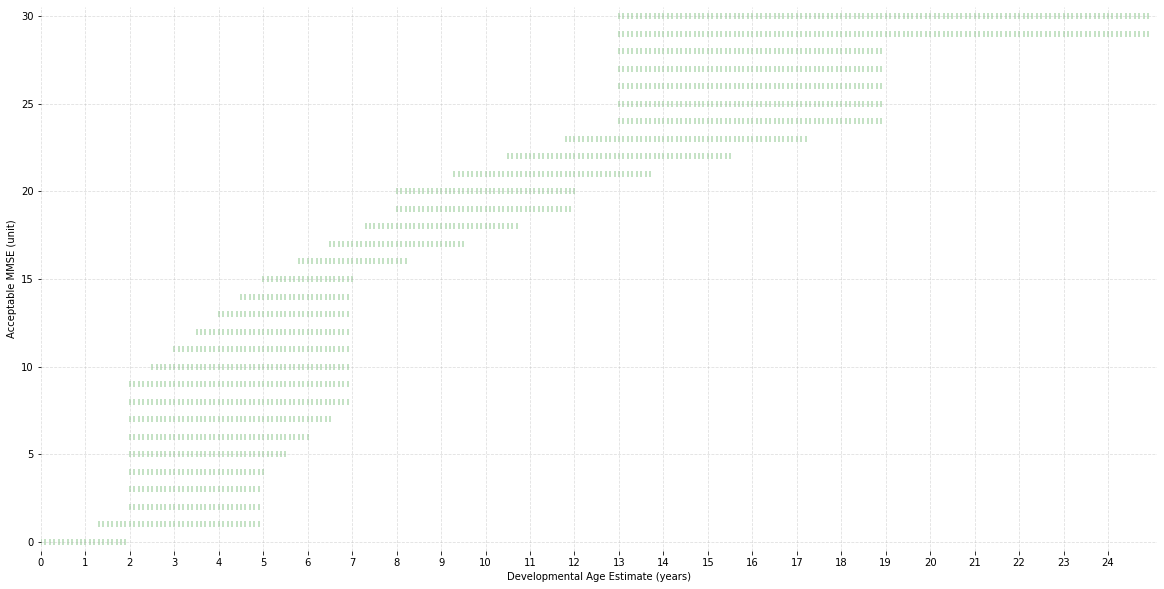

In [4]:
from math import floor, ceil


def is_good_developmental_age_estimate(estimate: float, mmse: int) -> bool:
    """
    Outputs a MMSE approximation given the developmental age estimated by an EEG model.
    """
    assert 0 <= mmse <= 30, "MMSE must be between 0 and 30"
    assert 0 <= estimate, "Developmental age estimate must be positive"

    if estimate < 1.25:
        return 0 <= mmse <= estimate/2
    elif estimate < 2:
        return floor((4 * estimate / 15) - (1 / 3)) <= mmse <= ceil(estimate/2)
    elif estimate < 5:
        return (4*estimate/15) - (1/3) <= mmse <= 2*estimate + 5
    elif estimate < 7:
        return 2*estimate - 6 <= mmse <= (4*estimate/3) + (25/3)
    elif estimate < 8:
        return (4*estimate/5) + (47/5) <= mmse <= (4*estimate/3) + (25/3)
    elif estimate < 12:
        return (4 * estimate / 5) + (47 / 5) <= mmse <= (4 * estimate / 5) + (68 / 5)
    elif estimate < 13:
        return (4 * estimate / 7) + (92 / 7) <= mmse <= (4 * estimate / 5) + (68 / 5)
    elif estimate < 19:
        return (4 * estimate / 7) + (92 / 7) <= mmse <= 30
    elif estimate >= 19:
        return mmse >= 29


accurate = []
inaccurate = []
for estimate_ in range(0, 250):
    estimate = estimate_ / 10
    for mmse in range(0, 31):
        if is_good_developmental_age_estimate(estimate, mmse):
            accurate.append((estimate, mmse))
        else:
            inaccurate.append((estimate, mmse))

# Plot points
# accurate green, inaccurate red
# x-axis: developmental age estimate
# y-axis: MMSE
import matplotlib.pyplot as plt
accurate_x, accurate_y = zip(*accurate)
plt.figure(figsize=(20, 10))
plt.xlabel('Developmental Age Estimate (years)')
plt.ylabel('Acceptable MMSE (unit)')
plt.xticks(range(0,25))
plt.xlim(0, 25.1)
plt.ylim(-0.5, 30.5)
plt.grid(linestyle='--', alpha=0.4)
plt.scatter(accurate_x, accurate_y, color='g', marker='|', alpha=0.3)  # square markers
# remove box around plot
plt.box(False)
plt.show()

We'll sample 100 random points in each block and calculate the R2 score.

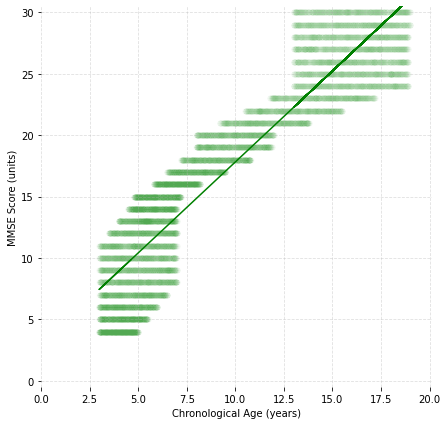

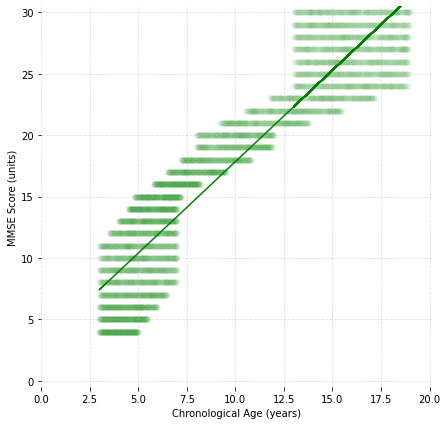

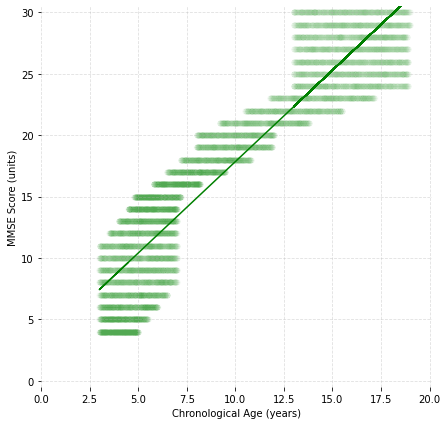

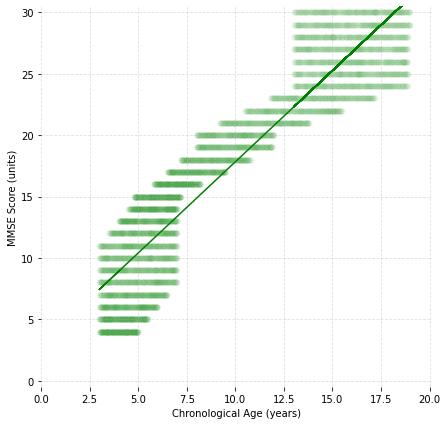

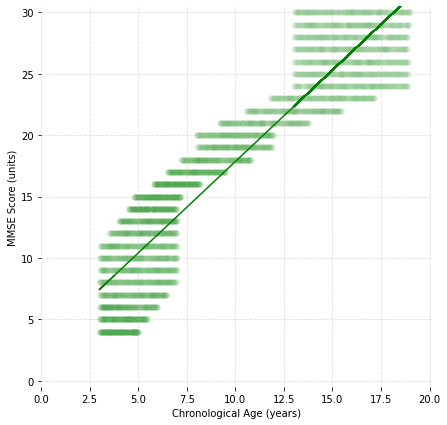

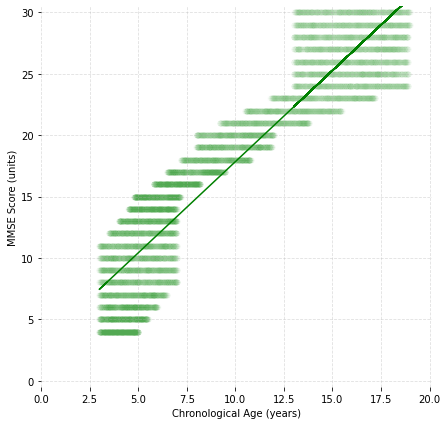

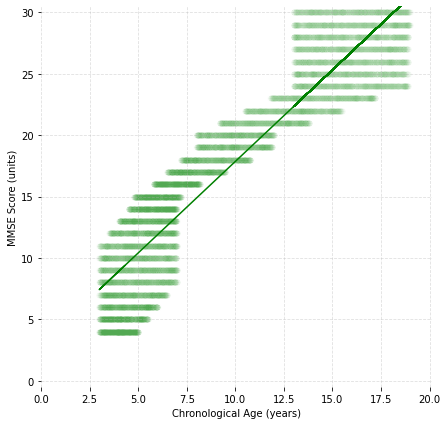

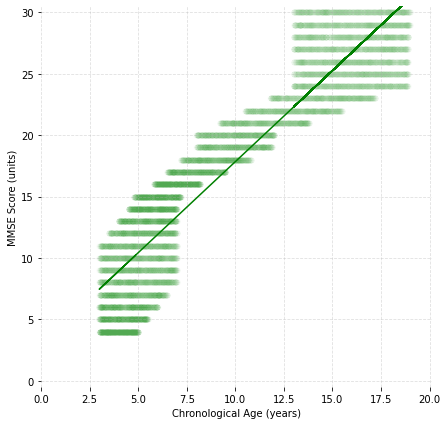

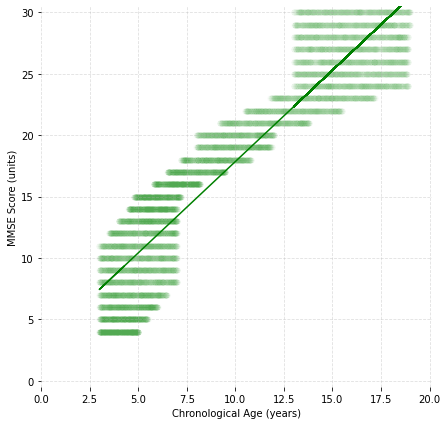

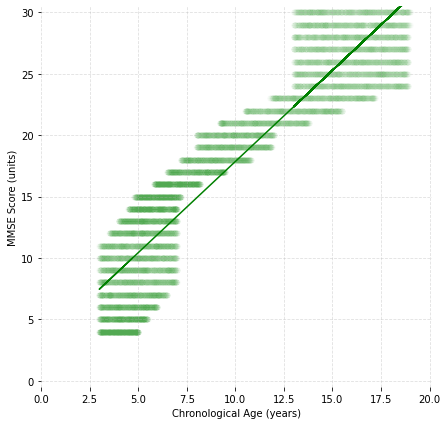

Avg. R2 scores: 0.7453956203039527
Avg. Spearman rank correlation: 0.9265666945222485
Avg. Pearson correlation: 0.9241827938300542


In [22]:
# Define age boundaries for each MMSE unit
# Ages domain: [3, 19]
# MMSE domain: [4, 30]
# We restricted the boundaries to the actual domain of the data we are using. In comments remain the real boundaries.
boundaries = {
    4: (3, 5),#(2, 5),
    5: (3, 5.5),#(2, 5.5),
    6: (3, 6),#(2, 6),
    7: (3, 6.5),#(2, 6.5),
    8: (3, 7),#(2, 7),
    9: (3, 7),#(2, 7),
    10: (3, 7),#(2.5, 7),
    11: (3, 7),
    12: (3.5, 7),
    13: (4, 7),
    14: (4.5, 7),
    15: (4.8, 7.2),
    16: (5.8, 8.2),
    17: (6.5, 9.5),
    18: (7.2, 10.8),
    19: (8, 11.9),
    20: (8, 12),
    21: (9.2, 13.8),
    22: (10.5, 15.5),
    23: (11.8, 17.2),
    24: (13, 18.9),
    25: (13, 18.9),
    26: (13, 18.9),
    27: (13, 18.9),
    28: (13, 18.9),
    29: (13, 19),#(13, 25),
    30: (13, 19),#(13, 25)
}


import random
import numpy as np
# Repeat the experiment 10 times
r2_scores = []
spearman_scores = []
pearson_scores = []
for _ in range(10):
    samples = []
    for mmse, (min_age, max_age) in boundaries.items():
        for _ in range(1000):  # Sample 1000 points in each MMSE block
            age = random.uniform(min_age, max_age)
            samples.append((age, mmse))
    samples = np.array(samples)
    
    
    
    # plot
    plt.figure(figsize=(7, 7))
    plt.scatter(samples[:, 0], samples[:, 1], alpha=.01, color='g')
    # plot regression line
    m, b = np.polyfit(samples[:, 0], samples[:, 1], 1)
    plt.plot(samples[:, 0], m * samples[:, 0] + b, color='g')
    plt.xlabel('Chronological Age (years)')
    plt.ylabel('MMSE Score (units)')
    plt.xlim(0, 20.1)
    plt.ylim(-0.5, 30.5)
    plt.grid(linestyle='--', alpha=0.4)
    plt.box(False)
    plt.show()
    
    # normalize between 0 and 1
    samples[:, 0] = (samples[:, 0] - samples[:, 0].min()) / (samples[:, 0].max() - samples[:, 0].min())
    samples[:, 1] = (samples[:, 1] - samples[:, 1].min()) / (samples[:, 1].max() - samples[:, 1].min())
    
    # compute R2 score
    from sklearn.metrics import r2_score
    r2_scores.append(r2_score(samples[:, 0], samples[:, 1]))
    
    # compute Spearman rank correlation
    from scipy.stats import spearmanr
    spearman, pvalue = spearmanr(samples[:, 0], samples[:, 1], alternative='greater')
    spearman_scores.append(spearman)
    
    # compute Pearson correlation
    from scipy.stats import pearsonr
    pearson, pvalue = pearsonr(samples[:, 0], samples[:, 1])
    pearson_scores.append(pearson)
    
print(f'Avg. R2 scores: {np.mean(r2_scores)}')
print(f'Avg. Spearman rank correlation: {np.mean(spearman_scores)}')
print(f'Avg. Pearson correlation: {np.mean(pearson_scores)}')

    

    